In [1]:
# perceptron in scikit with single tlu network

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length and width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, .5]])
print(y_pred)
# perceptron does not output a class probability like logistic regression
# but uses a hard threshold classification

[0]


In [2]:
# we use nonlinear activations functions in mlps like sigmoid, hyperbolic tangent, relu because
# linear transformations of multiple linear functions are still linear. by nesting the
# above activation functions in each layer, you can basically approximate any continuous function

# a typical regression mlp follows this format
# input neurons : one per feature
# hidden layers: typically 1 to 5
# neurons per hidden layer : typically 10 to 100
# output neurons : 1 per prediction dimension
# hidden activation : ReLU
# output activation: None, or relu/softplus if positive only outputs or logistic/tanh if bounded outputs
# loss function: MSE or MAE/Huber if outliers


# classification mlp
# input and hidden layers: same as regression
# output neurons: 1 for binary classification, 1 per label for multilabel binary, 1 per class for multiclass
# output layer activation: logistic for binary and multilabel binary, softmax for multiclass
# loss function: cross entropy
# use softmax for multiclass because if the classes are exclusive the sum of all 
# output neurons will be 1. for multilabel and binary classes, you can you log because they may not be exclusive



In [3]:
# tensorflow and keras time

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [4]:
# now, we will build an image classifier

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
# X_train_full.shape
# X_train_full.dtype

# split train set into validation and train / scale pixel intensities by dividing by 255.0

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# get the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[0]])

Coat


In [6]:
# now build the neural net. classification mlp with 2 hidden layers

model = keras.models.Sequential() # create sequential model
model.add(keras.layers.Flatten(input_shape=[28, 28])) # convert image into 1d array
model.add(keras.layers.Dense(300, activation='relu')) # dense layer, 300 neurons, relu activation
model.add(keras.layers.Dense(100, activation='relu')) # dense layer, 100 neurons, relu
model.add(keras.layers.Dense(10, activation='softmax')) # 10 output neurons, softmax because exclusivity of class
# each dense layer manages its own weight matrix containing all connection weights between the neurons and
# their inputs. it also manages a vector of bias terms (one per neuron)

In [7]:
# instead of adding layers one by one, we could just do it this way
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
# use sparse categorical crossentropy because we have sparse labels

In [11]:
# now to train the model

history = model.fit(X_train, y_train, epochs=30, 
                   validation_data=(X_valid, y_valid))
print(history)

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7259 - accuracy: 0.7622 - val_loss: 0.5389 - val_accuracy: 0.8220
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4896 - accuracy: 0.8289 - val_loss: 0.4665 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4474 - accuracy: 0.8433 - val_loss: 0.4302 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4191 - accuracy: 0.8527 - val_loss: 0.4006 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3992 - accuracy: 0.8606 - val_loss: 0.3932 - val_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3826 - accuracy: 0.8651 - val_loss: 0.3796 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3685 - accuracy: 0.8707 - val_loss: 0.3816 - val_accuracy:

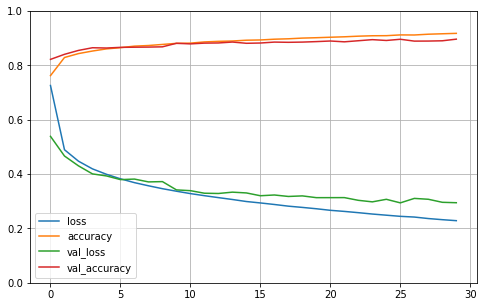

In [12]:
# take a closer look at the model history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [1]:
# evaluate on the test set

model.evaluate(X_test, y_test)

NameError: name 'model' is not defined

In [14]:
# how to use the model to make predictions

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
# building regression ann

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [4]:
import tensorflow as tf
from tensorflow import keras
# only one output neuron for regression with no activation function

# we will use only 1 hidden layer with a small number of neurons to avoid overfitting this noisy dataset

model = keras.models.Sequential = ([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
print(len(model))
print(model[0])
# use mse loss for regression
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

2


AttributeError: 'list' object has no attribute 'compile'

In [12]:
# keras functional api

# wide and deep neural network to allow input reach end without being distorted
# we will get the complex patterns from the deeper hidden layers and the 
# simple patterns from feeding the input layer to the concat layer
print(X_train.shape)
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

(11610, 8)


In [14]:
# what if we wanted to subset the features so that some go wide and some go deep of the hidden layers?

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [16]:
# now we must pass the model a pair of matrices A and B

model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

/home/frel/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2119 - val_loss: 0.9806
Epoch 2/20
363/363 [==============================] - 0s 828us/step - loss: 0.8013 - val_loss: 0.6883
Epoch 3/20
363/363 [==============================] - 0s 882us/step - loss: 0.6343 - val_loss: 0.6115
Epoch 4/20
363/363 [==============================] - 0s 821us/step - loss: 0.5821 - val_loss: 0.5716
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5501 - val_loss: 0.5495
Epoch 6/20
363/363 [==============================] - 0s 828us/step - loss: 0.5285 - val_loss: 0.5241
Epoch 7/20
363/363 [==============================] - 0s 849us/step - loss: 0.5117 - val_loss: 0.5070
Epoch 8/20
363/363 [==============================] - 0s 839us/step - loss: 0.4993 - val_loss: 0.4961
Epoch 9/20
363/363 [==============================] - 0s 831us/step - loss: 0.4903 - val_loss: 0.4882
Epoch 10/20
363/363 [==============================] - 0s 854us/step - loss: 0.4829 - 

In [18]:
# what if you want to output a layer for regularization?

output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
# have to pass multiple loss functions and loss weights now

model.compile(loss=['mse', 'mse'], loss_weights=[.9, .1], optimizer='sgd')

history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8193 - main_output_loss: 0.7683 - aux_output_loss: 1.2780 - val_loss: 0.5092 - val_main_output_loss: 0.4737 - val_aux_output_loss: 0.8288
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4844 - main_output_loss: 0.4512 - aux_output_loss: 0.7835 - val_loss: 0.5729 - val_main_output_loss: 0.5462 - val_aux_output_loss: 0.8131
Epoch 3/20
363/363 [==============================] - 0s 936us/step - loss: 0.4642 - main_output_loss: 0.4369 - aux_output_loss: 0.7100 - val_loss: 0.6004 - val_main_output_loss: 0.5766 - val_aux_output_loss: 0.8144
Epoch 4/20
363/363 [==============================] - 0s 972us/step - loss: 0.4513 - main_output_loss: 0.4274 - aux_output_loss: 0.6659 - val_loss: 0.6593 - val_main_output_loss: 0.6371 - val_aux_output_loss: 0.8590
Epoch 5/20
363/363 [==============================] - 0s 949us/step - loss: 0.4439 - main_output_loss: 0.4224 - aux_output_loss: 0.6379 - va

In [19]:
# predict will return predictions for each output

total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 722us/step - loss: 8.3940 - main_output_loss: 8.3772 - aux_output_loss: 8.5455
